In [1]:
from keras import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

#SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
path1 = 'data/train/input_data'
path2 = 'data/train/input_data_resized'

In [4]:
listing = os.listdir(path1)

In [5]:
listing

['b-360.png',
 'd-238.png',
 'c-137.png',
 'c-32.png',
 'c-460.png',
 'b-108.png',
 'e-85.png',
 'd-230.png',
 'b-13.png',
 'd-305.png',
 'd-489.png',
 'd-515.png',
 'b-24.png',
 'd-407.png',
 'b-278.png',
 'd-290.png',
 'c-384.png',
 'e-208.png',
 'e-541.png',
 'c-473.png',
 'b-5.png',
 'a-159.png',
 'c-247.png',
 'e-168.png',
 'd-103.png',
 'e-531.png',
 'c-458.png',
 'b-148.png',
 'c-139.png',
 'a-313.png',
 'a-391.png',
 'c-310.png',
 'e-347.png',
 'b-75.png',
 'e-291.png',
 'a-373.png',
 'e-56.png',
 'a-439.png',
 'e-276.png',
 'd-139.png',
 'c-68.png',
 'e-134.png',
 'e-14.png',
 'e-374.png',
 'e-472.png',
 'd-85.png',
 'e-184.png',
 'd-517.png',
 'd-343.png',
 'c-493.png',
 'd-292.png',
 'b-282.png',
 'c-15.png',
 'c-395.png',
 'a-49.png',
 'a-116.png',
 'a-311.png',
 'c-306.png',
 'e-81.png',
 'c-142.png',
 'd-228.png',
 'a-324.png',
 'd-202.png',
 'e-396.png',
 'd-42.png',
 'd-142.png',
 'd-200.png',
 'b-19.png',
 'e-219.png',
 'e-3.png',
 'c-337.png',
 'b-396.png',
 'd-67.png

In [6]:
num_samples = size(listing)
num_samples

2547

In [32]:
img_rows, img_cols = 300, 300
for file in listing:
    im = Image.open(path1 + '/' + file)
    img = im.resize((img_rows, img_cols))
    gray = img.convert('L')
    gray.save(path2 + '/' + file, "png")

In [33]:
imlist = []

In [42]:
for filename in os.listdir("data/train/input_data_resized"): 
        if filename.startswith('e'):
            imlist.append(filename)

In [43]:
imlist

['a-159.png',
 'a-313.png',
 'a-391.png',
 'a-373.png',
 'a-439.png',
 'a-49.png',
 'a-116.png',
 'a-311.png',
 'a-324.png',
 'a-306.png',
 'a-246.png',
 'a-98.png',
 'a-171.png',
 'a-332.png',
 'a-430.png',
 'a-248.png',
 'a-366.png',
 'a-215.png',
 'a-295.png',
 'a-245.png',
 'a-361.png',
 'a-78.png',
 'a-447.png',
 'a-271.png',
 'a-275.png',
 'a-341.png',
 'a-222.png',
 'a-224.png',
 'a-352.png',
 'a-445.png',
 'a-7.png',
 'a-232.png',
 'a-192.png',
 'a-166.png',
 'a-426.png',
 'a-42.png',
 'a-167.png',
 'a-153.png',
 'a-326.png',
 'a-8.png',
 'a-261.png',
 'a-183.png',
 'a-286.png',
 'a-386.png',
 'a-303.png',
 'a-264.png',
 'a-19.png',
 'a-201.png',
 'a-432.png',
 'a-14.png',
 'a-345.png',
 'a-41.png',
 'a-152.png',
 'a-297.png',
 'a-195.png',
 'a-250.png',
 'a-269.png',
 'a-454.png',
 'a-284.png',
 'a-422.png',
 'a-404.png',
 'a-336.png',
 'a-207.png',
 'a-431.png',
 'a-394.png',
 'a-172.png',
 'a-154.png',
 'a-300.png',
 'a-451.png',
 'a-163.png',
 'a-68.png',
 'a-405.png',
 'a-

In [44]:
im1 = array(Image.open('data/train/input_data_resized' + '/' + imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

In [45]:
imnbr

2547

In [46]:
immatrix = array([array(Image.open('data/train/input_data_resized' + '/' + im2)).flatten() for im2 in imlist], 'f')

In [47]:
m,n = immatrix.shape[0:2]

In [48]:
m,n

(2547, 90000)

In [49]:
imlist

['a-159.png',
 'a-313.png',
 'a-391.png',
 'a-373.png',
 'a-439.png',
 'a-49.png',
 'a-116.png',
 'a-311.png',
 'a-324.png',
 'a-306.png',
 'a-246.png',
 'a-98.png',
 'a-171.png',
 'a-332.png',
 'a-430.png',
 'a-248.png',
 'a-366.png',
 'a-215.png',
 'a-295.png',
 'a-245.png',
 'a-361.png',
 'a-78.png',
 'a-447.png',
 'a-271.png',
 'a-275.png',
 'a-341.png',
 'a-222.png',
 'a-224.png',
 'a-352.png',
 'a-445.png',
 'a-7.png',
 'a-232.png',
 'a-192.png',
 'a-166.png',
 'a-426.png',
 'a-42.png',
 'a-167.png',
 'a-153.png',
 'a-326.png',
 'a-8.png',
 'a-261.png',
 'a-183.png',
 'a-286.png',
 'a-386.png',
 'a-303.png',
 'a-264.png',
 'a-19.png',
 'a-201.png',
 'a-432.png',
 'a-14.png',
 'a-345.png',
 'a-41.png',
 'a-152.png',
 'a-297.png',
 'a-195.png',
 'a-250.png',
 'a-269.png',
 'a-454.png',
 'a-284.png',
 'a-422.png',
 'a-404.png',
 'a-336.png',
 'a-207.png',
 'a-431.png',
 'a-394.png',
 'a-172.png',
 'a-154.png',
 'a-300.png',
 'a-451.png',
 'a-163.png',
 'a-68.png',
 'a-405.png',
 'a-

In [50]:
label = np.ones((num_samples,),dtype = int)

In [51]:
len(label)

2547

In [52]:
imlist[460:937]

['b-360.png',
 'b-108.png',
 'b-13.png',
 'b-24.png',
 'b-278.png',
 'b-5.png',
 'b-148.png',
 'b-75.png',
 'b-282.png',
 'b-19.png',
 'b-396.png',
 'b-359.png',
 'b-428.png',
 'b-419.png',
 'b-257.png',
 'b-133.png',
 'b-52.png',
 'b-74.png',
 'b-17.png',
 'b-99.png',
 'b-247.png',
 'b-301.png',
 'b-364.png',
 'b-225.png',
 'b-266.png',
 'b-387.png',
 'b-277.png',
 'b-227.png',
 'b-451.png',
 'b-50.png',
 'b-380.png',
 'b-154.png',
 'b-102.png',
 'b-123.png',
 'b-452.png',
 'b-152.png',
 'b-91.png',
 'b-406.png',
 'b-165.png',
 'b-281.png',
 'b-130.png',
 'b-268.png',
 'b-420.png',
 'b-58.png',
 'b-383.png',
 'b-206.png',
 'b-177.png',
 'b-264.png',
 'b-163.png',
 'b-296.png',
 'b-180.png',
 'b-207.png',
 'b-393.png',
 'b-45.png',
 'b-26.png',
 'b-15.png',
 'b-292.png',
 'b-434.png',
 'b-238.png',
 'b-410.png',
 'b-105.png',
 'b-93.png',
 'b-267.png',
 'b-347.png',
 'b-84.png',
 'b-218.png',
 'b-272.png',
 'b-345.png',
 'b-143.png',
 'b-95.png',
 'b-110.png',
 'b-31.png',
 'b-88.png',

In [53]:
label[0:460] = 0
label[460:937] = 1 
label[937:1446] = 2
label[1446:2004] = 3
label[2004:] = 4

In [54]:
data, label = shuffle(immatrix, label, random_state = 2)
train_data = [data, label]

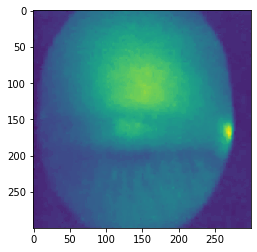

In [55]:
img = immatrix[167].reshape(img_cols, img_rows)
plt.imshow(img)

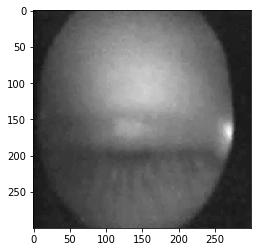

In [56]:
plt.imshow(img, cmap = 'gray')

In [57]:
print(train_data[0].shape)
print(train_data[1][1])

(2547, 90000)
2


In [58]:
batch_size = 32
nb_classes = 5
nb_epoch = 20

In [59]:
img_rows, img_cols = 300, 300

In [60]:
#number of channels
img_channels = 1

#number of convolution filters to use
nb_filters = 32

#size of pooling area for max pooling
nb_pool = 2

#convolution kernel size
nb_conv = 3

In [61]:
(X,y) = (train_data[0], train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [62]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [63]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [64]:
print('X_train_shape:', X_train.shape)

X_train_shape: (2037, 1, 300, 300)


In [65]:
X_train /= 255
X_test /= 255

In [66]:
print('X_train_shape:', X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

X_train_shape: (2037, 1, 300, 300)
2037 train_samples
510 test_samples


In [67]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [68]:
Y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [69]:
Y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

label :  [0. 0. 0. 0. 1.]


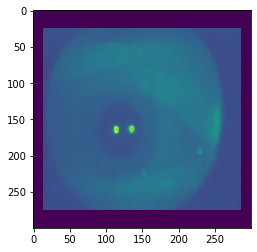

In [93]:
i = 1906
plt.imshow(X_train[i, 0], interpolation = 'nearest')
print('label : ', Y_train[i, :])

In [95]:
model = Sequential()

In [97]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [99]:
model.add(Convolution2D(nb_filters, nb_conv, border_mode = 'valid', input_shape = (1, img_rows, img_cols)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(1, 300, 3..., padding="valid")`
  """Entry point for launching an IPython kernel.


In [100]:
convout1 = Activation('relu')

model.add(convout1

In [101]:
model.add(convout1)

In [104]:
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [105]:
convout2 = Activation('relu')

In [106]:
model.add(convout2)

In [108]:
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))

In [109]:
model.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [110]:
model.add(Flatten())

In [111]:
model.add(Dense(128))

In [112]:
model.add(Activation('relu'))

In [114]:
model.add(Dropout(0.5))

In [115]:
model.add(Dense(nb_classes))

In [116]:
model.add(Activation('softmax'))

In [122]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics=['accuracy'])

In [123]:
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = nb_epoch, verbose = 1, validation_split = 0.2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 2037 samples, validate on 510 samples
Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor with shape[691488,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_1/Adadelta/mul_36}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_2/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
